In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

P = np.linspace(500, 5000, 100)      # Pressure range in psia
Pb = 3000                            # Bubble point pressure in psia
T = 200                              # Reservoir temperature in °F
API = 35                             # Oil API gravity
sg_gas = 0.8                         # Specific gravity of gas
sg_oil = 141.5 / (API + 131.5)       # Specific gravity of oil


In [3]:


def Rs_standing(P, Pb, sg_gas, API, T):
    """Solution GOR [scf/STB]"""
    if P < Pb:
        return (sg_gas / sg_oil)**0.83 * (P)**1.2 * np.exp(0.0125 * API) / (T + 460)**1.2
    else:
        return (sg_gas / sg_oil)**0.83 * (Pb)**1.2 * np.exp(0.0125 * API) / (T + 460)**1.2

def Bo_standing(Rs, sg_gas, API, T):
    """Oil formation volume factor [bbl/STB]"""
    return 1 + 0.0001 * (Rs * (sg_gas / sg_oil)**0.5 + 1.25 * T - 460)


In [4]:

Rs_vals = np.array([Rs_standing(p, Pb, sg_gas, API, T) for p in P])
Bo_vals = Bo_standing(Rs_vals, sg_gas, API, T)


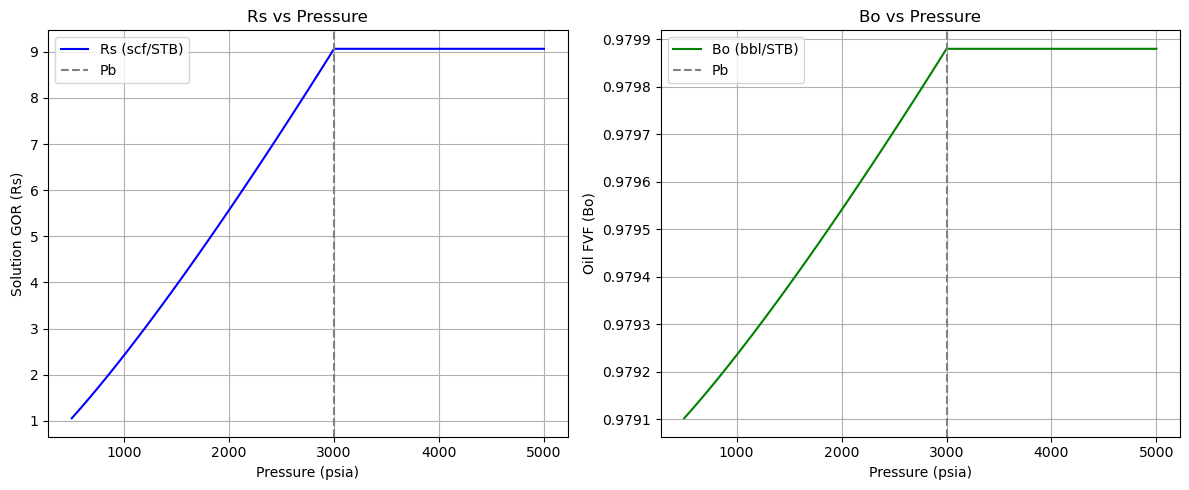

In [6]:

plt.figure(figsize=(12, 5))

# Rs vs Pressure
plt.subplot(1, 2, 1)
plt.plot(P, Rs_vals, label='Rs (scf/STB)', color='blue')
plt.axvline(Pb, color='gray', linestyle='--', label='Pb')
plt.xlabel('Pressure (psia)')
plt.ylabel('Solution GOR (Rs)')
plt.title('Rs vs Pressure')
plt.grid(True)
plt.legend()

# Bo vs Pressure
plt.subplot(1, 2, 2)
plt.plot(P, Bo_vals, label='Bo (bbl/STB)', color='green')
plt.axvline(Pb, color='gray', linestyle='--', label='Pb')
plt.xlabel('Pressure (psia)')
plt.ylabel('Oil FVF (Bo)')
plt.title('Bo vs Pressure')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
